In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 #파일을 읽어올때만 사용하였고 filter나 operation 연산에서는 사용하지 않았습니다.
from math import cos, pi, sqrt

: 

#RAW 파일을 BMP 파일로 변환 

In [ ]:
ROWS = 512    
COLS =  512
fin = open('BOAT512.raw.raw')   
img_1 = np.fromfile(fin, dtype = np.uint8, count = ROWS * COLS) #이진파일을 배열형태로 변환
img_1.shape = (img_1.size // COLS, COLS) 
image = Image.fromarray(img_1)  #Image.fromarray() 를 사용하여 numpy 배열을 PIL Image로 변환하고, 이를 save() 를 통해 저장하면 된다.
image.save('NewBOAT512.bmp')
fin.close()


: 

#2-D DCT

In [ ]:
#2차원 DCT 수정본
def DCT_2D(f_x_y):
    img_size = f_x_y.shape
    heights = img_size[0]
    widths = img_size[1]  
    size = 8  
    tot = np.zeros(size*size)
    l = np.zeros((size,size)) #필터 저장 창고
    gray_img_copy = np.zeros((heights,widths))
    total = 0
    for a in range(0,heights,size):
        for b in range(0, widths,size):
        #print("a", a, "b", b)
        # Looping for storing the value
            f=0

            for c in range(a,a+size):
                g=0
                for d in range(b,b+size):
                    l[f,g] = f_x_y[c,d]
                    g += 1
                f += 1
            #블록 필터에 8*8 저장 됨 
            for u in range(a,a+size):
                for v in range(b,b+size):
                    j = 0                    
                    for x in range(0,size):
                        for y in range(0,size):
                            #저장후 sigma를 취할 공간 
                            tot[j] = l[x,y]*cos(((2*x+1)*u*pi)/(2*size))*cos(((2*y+1)*v*pi)/(2*size))                        
                            j += 1
                #print("j", tot[63])

                    k = 0
                
                    for k in range(0,size*size):
                        total += tot[k]
                #print("k", k)
                
                # Perkalian CuCv
                    if u == 0 :
                        cucv1 = 1/sqrt(2)
                    elif 0 < u:
                        cucv1 = sqrt(2)/sqrt(size)
                    if   v == 0 :
                        cucv2 = 1/sqrt(2)
                    elif  0 < v :
                        cucv2 = sqrt(2)/sqrt(size)
                    
                    dct_result = cucv1*cucv2*total
                    gray_img_copy[u, v] = round(dct_result)

                    #Reset
                    total = 0
                    dct_result = 0
                    tot = np.zeros(size*size)
                        
                
    return gray_img_copy                    


    

: 

##Inverse 2-D DCT

In [ ]:
def Inverse_DCT_2D(F_u_v):
    img_size = F_u_v.shape
    heights = img_size[0]
    widths = img_size[1]  
    size = 8  
    tot = np.zeros(size*size)
    l = np.zeros((size,size))
    gray_img_copy = np.zeros((heights,widths))
    gray_img_copy2 = np.zeros((heights,widths))
    
    for a in range(0,heights,size):
        for b in range(0, widths,size):       
            f=0
            for c in range(a,a+size):
                g=0
                for d in range(b,b+size):
                    l[f,g] = F_u_v[c,d]
                    g += 1
                f += 1
            #total = 0                
            for x in range(a,a+size):
                for y in range(b,b+size):
                    total = 0 
                    j = 0
                    for u in range(0,size):
                        for v in range(0,size):
                        #aw = n-a
                        
                            if u == 0 :
                                cucv1 = 1/sqrt(size)
                            elif u > 0 :
                                cucv1 = 1
                            if v == 0 :
                                cucv2 = 1/sqrt(size)
                            elif v > 0 :
                                cucv2 = 1
                            tot[j] = cucv1*cucv2*l[u,v]*cos((2*x+1)*u*pi/(2*size))*cos((2*y+1)*v*pi/(2*size))
                        #print("h", h, "i", i, "tot", tot[i], "Pixel skrg", l[h,i])
                            j += 1

                # PENJUMLAHAN SEMUA
                    k = 0
                    
                    for k in range(0,size*size):
                        total += tot[k]
                    
                    dct_result = total

                    gray_img_copy[x, y] = round(dct_result)
                    #return gray_img_copy           
    return gray_img_copy    

: 

##MSE:오차

In [ ]:
#MSE 
def MSE (Y_true,Y_pred):   
    mse_new = np.square(np.subtract(Y_true,Y_pred)).mean()
    return mse_new

: 

##Image Block

In [ ]:
image = Image.open('NewBOAT512.bmp').convert('L')
np_image = np.array(image)
print("Before dct() .....Printing forward[][]")
print(np_image)

print("After dct() .....Printing DCT[][]")
DCT_2D_img = DCT_2D(np_image)
np.set_printoptions(precision=0, suppress=True) #소수점을 날리기 위해 np.set_printoptions 함수 이용 !!!  
print(DCT_2D_img)

print("After inverse dct() .....Printing DCT[][]")
Inverse_DCT_2D_img = Inverse_DCT_2D(DCT_2D_img)
print(Inverse_DCT_2D_img)

Before dct() .....Printing forward[][]
[[186 186 190 ... 141 145 138]
 [183 186 187 ... 139 144 142]
 [182 186 182 ... 139 141 141]
 ...
 [164 164 159 ... 100  85  83]
 [160 159 162 ...  88  87  87]
 [152 152 158 ...  88 122 108]]
After dct() .....Printing DCT[][]
[[5886.   -7.    8. ...   -5.  -10.    2.]
 [  14.   -1.    6. ...   -1.   -3.   -1.]
 [   6.    0.    2. ...    0.    0.   -2.]
 ...
 [ -80.   56.  -24. ...   -9.   -8.   37.]
 [   0.   -7.    7. ...  -30.   24.    2.]
 [ 200.  -23.   27. ...   22.  -21.  -55.]]
After inverse dct() .....Printing DCT[][]
[[742. 744. 759. ...   0.   8. -16.]
 [732. 743. 748. ... -12.   3.   8.]
 [728. 742. 728. ...  -9.  15. -19.]
 ...
 [ 62.  66.  63. ... -27.  21.  11.]
 [-38. -34. -45. ...   7. -18.  -7.]
 [  2.   8.   1. ...  10.  14.  -9.]]


: 

##영상 
원영상 DCT 변환된 영상 복원한 영상

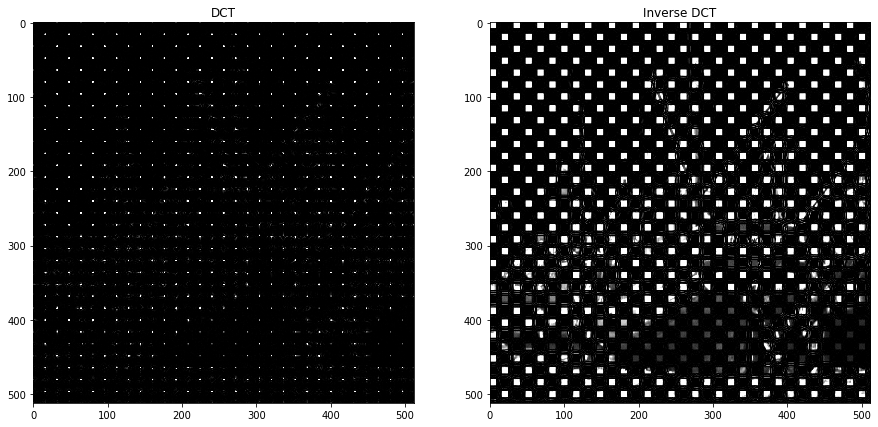

: 

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("DCT")
plt.imshow(DCT_2D_img, cmap="gray", vmin=0, vmax=255)

plt.subplot(122)
plt.title("Inverse DCT")
plt.imshow(Inverse_DCT_2D_img, cmap="gray", vmin=0, vmax=255)

In [ ]:
MSE_output=MSE(np_image,Inverse_DCT_2D_img)
print("MSE_output: {}".format(MSE_output)) #

MSE_output: 53231.11653137207


: 